# Прогнозирование оттока клиентов в сети отелей «Как в гостях»

### Введение

**Описание проекта:**

- Заказчик этого исследования — сеть отелей «Как в гостях». Чтобы привлечь клиентов, эта сеть отелей добавила на свой сайт возможность забронировать номер без предоплаты. Однако если клиент отменял бронирование, то компания терпела убытки. Сотрудники отеля могли, например, закупить продукты к приезду гостя или просто не успеть найти другого клиента.

**Цель проекта:**

- Чтобы решить эту проблему, нужно разработать систему, которая предсказывает отказ от брони. Если модель покажет, что бронь будет отменена, то клиенту предлагается внести депозит. Размер депозита — 80% от стоимости номера за одни сутки и затрат на разовую уборку. Деньги будут списаны со счёта клиента, если он всё же отменит бронь.

**Бизнес-метрика и другие данные:**

- Основная бизнес-метрика для любой сети отелей — её прибыль. Прибыль отеля — это разница между стоимостью номера за все ночи и затраты на обслуживание: как при подготовке номера, так и при проживании постояльца. В отеле есть несколько типов номеров. В зависимости от типа номера назначается стоимость за одну ночь. Есть также затраты на уборку. Если клиент снял номер надолго, то убираются каждые два дня. 

- Стоимость номеров отеля:  
• категория A: за ночь — 1 000, разовое обслуживание — 400;  
• категория B: за ночь — 800, разовое обслуживание — 350;  
• категория C: за ночь — 600, разовое обслуживание — 350;  
• категория D: за ночь — 550, разовое обслуживание — 150;  
• категория E: за ночь — 500, разовое обслуживание — 150;  
• категория F: за ночь — 450, разовое обслуживание — 150;  
• категория G: за ночь — 350, разовое обслуживание — 150.  

- В ценовой политике отеля используются сезонные коэффициенты: весной и осенью цены повышаются на 20%, летом — на 40%.
Убытки отеля в случае отмены брони номера — это стоимость одной уборки и одной ночи с учётом сезонного коэффициента.
На разработку системы прогнозирования заложен бюджет — 400 000. При этом необходимо учесть, что внедрение модели должно окупиться за тестовый период. Затраты на разработку должны быть меньше той выручки, которую система принесёт компании.

**Описание данных:**

В таблицах hotel_train и hotel_test содержатся одинаковые столбцы:  
•	id — номер записи;  
•	adults  — количество взрослых постояльцев;  
•	arrival_date_year — год заезда;  
•	arrival_date_month — месяц заезда;  
•	arrival_date_week_number — неделя заезда;  
•	arrival_date_day_of_month — день заезда;  
•	babies — количество младенцев;  
•	booking_changes — количество изменений параметров заказа;  
•	children — количество детей от 3 до 14 лет;  
•	country — гражданство постояльца;  
•	customer_type  — тип заказчика:  
- Contract — договор с юридическим лицом;  
- Group — групповой заезд;  
- Transient — не связано с договором или групповым заездом;  
- Transient-party — не связано с договором или групповым заездом, но связано с бронированием типа Transient.  

•	days_in_waiting_list — сколько дней заказ ожидал подтверждения;  
•	distribution_channel — канал дистрибуции заказа;  
•	is_canceled — отмена заказа;  
•	is_repeated_guest — признак того, что гость бронирует номер второй раз;  
•	lead_time — количество дней между датой бронирования и датой прибытия;  
•	meal — опции заказа:  
- SC — нет дополнительных опций;  
- BB — включён завтрак;  
- HB — включён завтрак и обед;  
- FB — включён завтрак, обед и ужин.  

•	previous_bookings_not_canceled — количество подтверждённых заказов у клиента;  
•	previous_cancellations — количество отменённых заказов у клиента;  
•	required_car_parking_spaces — необходимость места для автомобиля;  
•	reserved_room_type — тип забронированной комнаты;  
•	stays_in_weekend_nights — количество ночей в выходные дни;  
•	stays_in_week_nights — количество ночей в будние дни;  
•	total_nights — общее количество ночей;  
•	total_of_special_requests — количество специальных отметок.  

**Целевой переменной является "is_canceled"**, которая является двоичной и принимает значения 0 или 1, указывая, было ли бронирование отменено или нет.

### Шаг 1. Откройте файлы с данными

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('/datasets/hotel_train.csv')
test_data = pd.read_csv('/datasets/hotel_test.csv')

In [3]:
train_data.head()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,0,7.0,2015,July,27,1,0,1,1.0,...,0,0,0,A,0,0,Transient,0,0,1
1,1,0,14.0,2015,July,27,1,0,2,2.0,...,0,0,0,A,0,0,Transient,0,1,2
2,2,0,0.0,2015,July,27,1,0,2,2.0,...,0,0,0,C,0,0,Transient,0,0,2
3,3,0,9.0,2015,July,27,1,0,2,2.0,...,0,0,0,C,0,0,Transient,0,1,2
4,4,1,85.0,2015,July,27,1,0,3,2.0,...,0,0,0,A,0,0,Transient,0,1,3


### Шаг 2. Предобработка и исследовательский анализ данных

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65229 non-null  int64  
 1   is_canceled                     65229 non-null  int64  
 2   lead_time                       65229 non-null  float64
 3   arrival_date_year               65229 non-null  int64  
 4   arrival_date_month              65229 non-null  object 
 5   arrival_date_week_number        65229 non-null  int64  
 6   arrival_date_day_of_month       65229 non-null  int64  
 7   stays_in_weekend_nights         65229 non-null  int64  
 8   stays_in_week_nights            65229 non-null  int64  
 9   adults                          65229 non-null  float64
 10  children                        65229 non-null  float64
 11  babies                          65229 non-null  float64
 12  meal                            

In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              32412 non-null  int64  
 1   is_canceled                     32412 non-null  int64  
 2   lead_time                       32412 non-null  float64
 3   arrival_date_year               32412 non-null  int64  
 4   arrival_date_month              32412 non-null  object 
 5   arrival_date_week_number        32412 non-null  int64  
 6   arrival_date_day_of_month       32412 non-null  int64  
 7   stays_in_weekend_nights         32412 non-null  int64  
 8   stays_in_week_nights            32412 non-null  int64  
 9   adults                          32412 non-null  float64
 10  children                        32412 non-null  float64
 11  babies                          32412 non-null  float64
 12  meal                            

**Из предоставленной информации мы видим, что train_data имеет 65229 записей и 25 столбцов, без пропущенных значений. Типы данных для большинства столбцов кажутся подходящими.**

In [6]:
# Посмотрим на описательную статистику
print('Training data summary statistics:')
print(train_data.describe())

Training data summary statistics:
                 id   is_canceled     lead_time  arrival_date_year  \
count  65229.000000  65229.000000  65229.000000       65229.000000   
mean   43544.069172      0.368609     96.337917        2015.719021   
std    25614.858971      0.482431     96.127545           0.449481   
min        0.000000      0.000000      0.000000        2015.000000   
25%    19108.000000      0.000000     17.000000        2015.000000   
50%    40554.000000      0.000000     64.000000        2016.000000   
75%    67414.000000      1.000000    151.000000        2016.000000   
max    84121.000000      1.000000    374.000000        2016.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count              65229.000000               65229.000000   
mean                  31.339772                  15.847813   
std                   13.464024                   8.748182   
min                    1.000000                   1.000000   
25%                   21.

In [7]:
# Удалим столбец arrival_date_year из обоих фреймов данных
train_data.drop('arrival_date_year', axis=1, inplace=True)
test_data.drop('arrival_date_year', axis=1, inplace=True)

In [8]:
# Исследуем корреляцию признаков и удалим сильно коррелированные.
corr_matrix = train_data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
train_data.drop(to_drop, axis=1, inplace=True)
test_data.drop(to_drop, axis=1, inplace=True)

In [9]:
# Удалим записи, в которых количество взрослых гостей равно 0.
train_data = train_data[train_data['adults'] > 0]
test_data = test_data[test_data['adults'] > 0]

# Удалим записи, в которых количество детей равно 9 или 10.
train_data = train_data[train_data['children'] < 9]
test_data = test_data[test_data['children'] < 9]

# Обработаем столбец "meal", чтобы сопоставить строковые значения с числовыми значениями.
meal_mapping = {'BB': 0, 'HB': 1, 'FB': 2, 'SC': 3, 'Undefined': 4}
train_data['meal'] = train_data['meal'].str.strip().map(meal_mapping)
test_data['meal'] = test_data['meal'].str.strip().map(meal_mapping)

In [10]:
# Разделим страны по частям света.
def categorize_country(country):
    if country in ['PRT', 'ESP', 'GBR', 'IRL', 'FRA', 'BEL', 'NLD', 'CHE', 'DEU', 'AUT', 'ITA', 'SWE', 'DNK', 'NOR', 'FIN']:
        return 'Europe'
    elif country in ['USA', 'BRA', 'CAN', 'MEX']:
        return 'Americas'
    elif country in ['AUS', 'NZL']:
        return 'Oceania'
    elif country in ['ARE', 'ISR', 'KWT', 'SAU']:
        return 'Middle East'
    elif country in ['CHE', 'TUR', 'EGY']:
        return 'Other'
    else:
        return 'Unknown'

In [11]:
train_data['country'] = train_data['country'].apply(categorize_country)
test_data['country'] = test_data['country'].apply(categorize_country)

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65063 entries, 0 to 65228
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65063 non-null  int64  
 1   is_canceled                     65063 non-null  int64  
 2   lead_time                       65063 non-null  float64
 3   arrival_date_month              65063 non-null  object 
 4   arrival_date_week_number        65063 non-null  int64  
 5   arrival_date_day_of_month       65063 non-null  int64  
 6   stays_in_weekend_nights         65063 non-null  int64  
 7   stays_in_week_nights            65063 non-null  int64  
 8   adults                          65063 non-null  float64
 9   children                        65063 non-null  float64
 10  babies                          65063 non-null  float64
 11  meal                            65063 non-null  int64  
 12  country                         

In [13]:
print(train_data.shape)
print(test_data.shape)

(65063, 23)
(32343, 23)


In [14]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32343 entries, 0 to 32411
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              32343 non-null  int64  
 1   is_canceled                     32343 non-null  int64  
 2   lead_time                       32343 non-null  float64
 3   arrival_date_month              32343 non-null  object 
 4   arrival_date_week_number        32343 non-null  int64  
 5   arrival_date_day_of_month       32343 non-null  int64  
 6   stays_in_weekend_nights         32343 non-null  int64  
 7   stays_in_week_nights            32343 non-null  int64  
 8   adults                          32343 non-null  float64
 9   children                        32343 non-null  float64
 10  babies                          32343 non-null  float64
 11  meal                            32343 non-null  int64  
 12  country                         

In [15]:
# Определим числовые и категориальные признаки.
num_features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 
                'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 
                'required_car_parking_spaces', 'total_of_special_requests']

cat_features = ['arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'meal', 'country', 
                'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'customer_type']

**На основании сводной статистики можно сделать следующие выводы:**

1. **Отмены**: в среднем было отменено 37% бронирований.

2. **Время выполнения заказа**: Среднее время выполнения заказа (время между бронированием и прибытием) составило 96 дней со стандартным отклонением 96 дней. *Максимальное время выполнения заказа составило 374 дня, что примерно равно 1 году.*

3. **Дата прибытия**: данные охватывают 2015 и 2016 годы. Среднее количество недель прибытия составило 31.34 (это означает, что в среднем гости прибывали в течение 31-й или 32-й недели года), а средний день месяца прибытия - 15.85.

4. **Продолжительность пребывания**: в среднем гости останавливались на 2.22 рабочих дня и 0.82 ночи на выходные. Средняя продолжительность пребывания составила 3.05 ночи.

5. **Гости**: среднее количество взрослых на бронирование составляло 1.83, максимальное количество — 4. Среднее количество детей и младенцев — 0.07 и 0.007 соответственно.

6. **Повторный гость**: примерно 2.7% гостей были постоянными гостями.

7. **История отмен**: среднее количество предыдущих отмен было 0.13, максимум 26.

8. **Изменения в бронировании**: в среднем гости вносили 0.19 изменений за бронирование.

9. **Список ожидания**: среднее количество дней, проведенных в списке ожидания, составило 3.33, а максимальное — 259.

10. **Особые пожелания**: Среднее количество особых пожеланий от гостей составило 0.51.

11. **Парковочные места**: Среднее количество необходимых парковочных мест составило 0.057.

В целом данные охватывают двухлетний период со значительной изменчивостью поведения гостей.  

**Потенциальные выбросы в данных**:

- **Время выполнения заказа**: максимальное время выполнения 374 дня довольно велико по сравнению со средним значением 96 дней. Это может указывать на несколько бронирований, сделанных заблаговременно, возможно, для специальных мероприятий или пикового сезона.

- **История отмен**: максимальное количество предыдущих отмен, равное 26, также довольно велико по сравнению со средним значением 0.13. Это может указывать на то, что несколько гостей часто отменяли бронирование, что может быть тревожным сигналом для отеля.

- **Список ожидания**: максимальное количество дней, проведенных в списке ожидания, равное 259, значительно выше, чем в среднем 3.33. Это может указывать на несколько исключительных случаев, когда гостям приходилось долго ждать, прежде чем они смогли оформить бронирование.

Важно отметить, что выбросы не обязательно означают ошибки в данных, но они могут указывать на необычные или экстремальные значения, требующие дальнейшего изучения.

1. Значения в столбце arrival_date_year для тренировочного и тестового датафреймов не совпадают. Поэтому решено удалить этот столбец.
2. После исследования корреляции признаков, для линейных моделей сильно коррелирующие признаки были удалены.
3. Есть записи, где количество взрослых постояльцев равно 0, они были удалены.
4. Были удалены записи, в которых количество детей равно 9 или 10. 
5. Обработан столбец "meal", чтобы сопоставить строковые значения с числовыми значениями.
5. В столбце “country” – страны разделены по частям света.

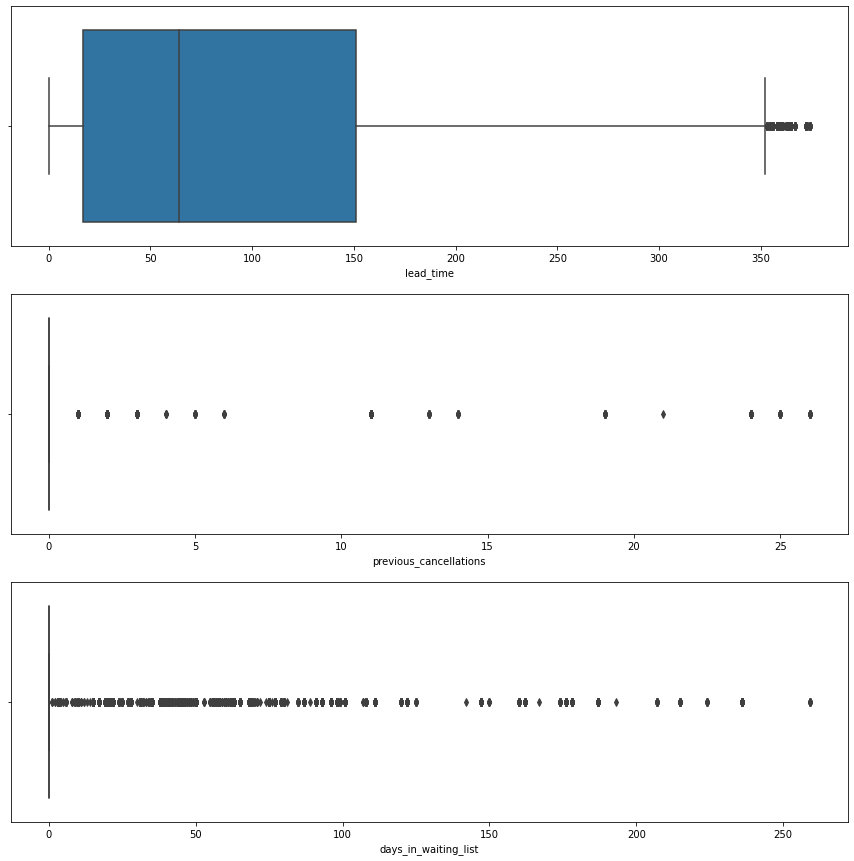

In [16]:
fig, axs = plt.subplots(3, 1, figsize=(15, 15))

sns.boxplot(x=train_data['lead_time'], ax=axs[0])

sns.boxplot(x=train_data['previous_cancellations'], ax=axs[1])

sns.boxplot(x=train_data['days_in_waiting_list'], ax=axs[2])


plt.show()

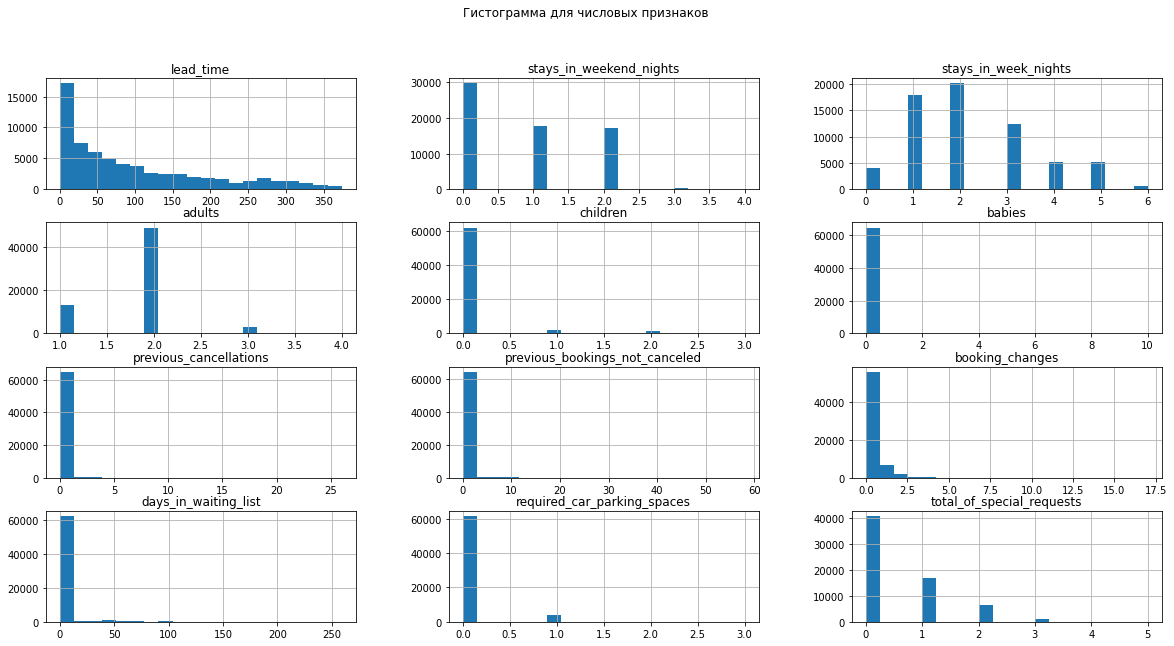

In [17]:
# Создадим гистограмму
train_data[num_features].hist(figsize=(20,10), bins=20)
plt.suptitle("Гистограмма для числовых признаков")
plt.show()

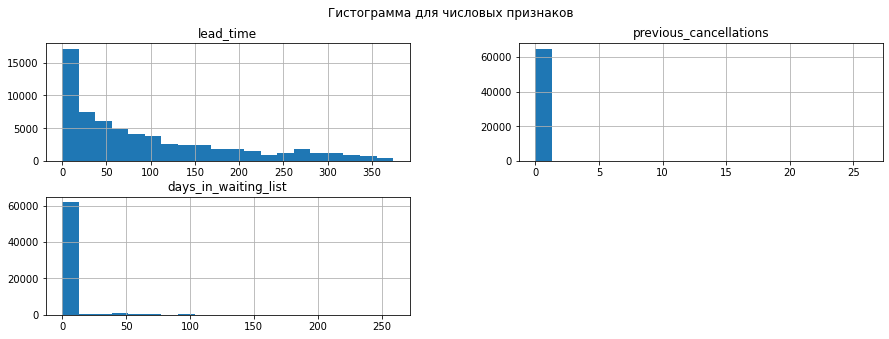

In [18]:
# Выберем столбцы, в которых были подозрения на выбросы
num_cols_1 = ['lead_time', 'previous_cancellations', 'days_in_waiting_list']

# Создадим гистограмму
train_data[num_cols_1].hist(figsize=(15, 5), bins=20)
plt.suptitle("Гистограмма для числовых признаков")
plt.show()

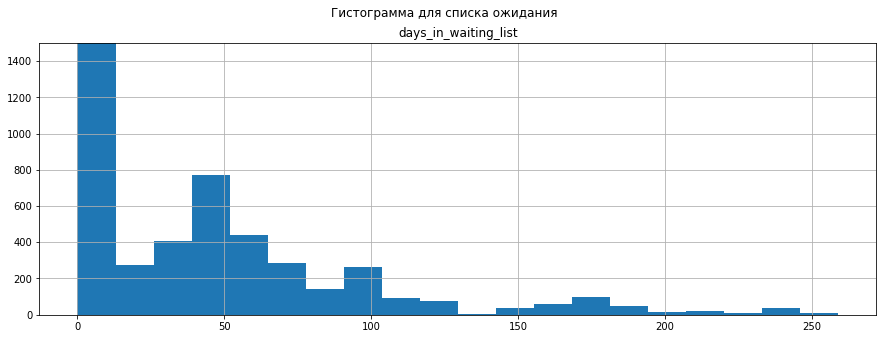

In [19]:
days_in_waiting_list = ['days_in_waiting_list']

train_data[days_in_waiting_list].hist(figsize=(15, 5), bins=20)
plt.suptitle("Гистограмма для списка ожидания")
plt.ylim([-1, 1500])
plt.show()

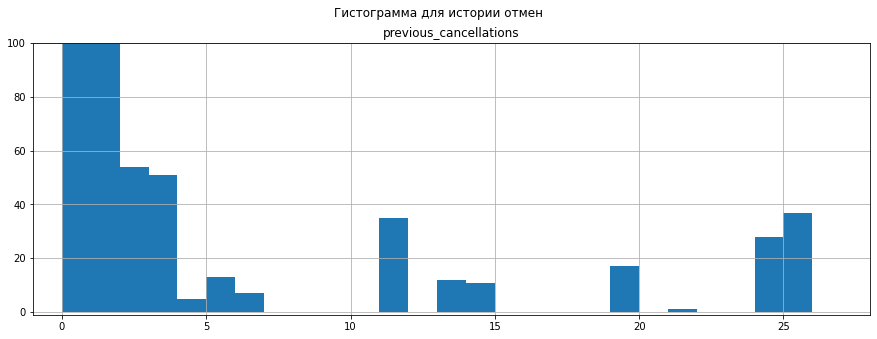

In [20]:
previous_cancellations = ['previous_cancellations']

train_data[previous_cancellations].hist(figsize=(15, 5), bins=26)
plt.suptitle("Гистограмма для истории отмен")
plt.xlim([-1, 28])
plt.ylim([-1, 100])
plt.show()

Мы можем подойти к выбросам следующими способами:

- **Время выполнения заказа**: максимальное время выполнения 374 дня может указывать на бронирование, сделанное заблаговременно для специальных мероприятий или пиковых сезонов. Эти бронирования по-прежнему действительны и могут дать ценную информацию для стратегии управления доходами отеля. Поэтому, возможно, лучше оставить эти выбросы как есть.

- **История отмен**: максимальное количество предыдущих отмен, равное 26, может указывать на несколько гостей с историей частых отмен, что может быть тревожным сигналом для отеля. Отелю, возможно, потребуется провести дополнительное исследование и решить, представляют ли эти гости риск для их бизнеса. Может быть целесообразно удалить эти выбросы, если они считаются нерелевантными или если они искажают понимание, полученное из данных. *Гистограмма распределения истории отмены показывает, что большинство значений находится в диапазоне от 0 до 4 (более 60000), а количество значений больше 10 очень мало (менее 40).*

- **Список ожидания**: максимальное количество дней, проведенных в списке ожидания, равное 259, значительно выше, чем в среднем 3,33. Это может указывать на несколько исключительных случаев, когда гостям приходилось долго ждать, прежде чем они смогли оформить бронирование. Подобно выбросам времени выполнения, эти бронирования по-прежнему действительны и могут дать ценную информацию для стратегии управления доходами отеля. Поэтому, возможно, лучше оставить эти выбросы как есть.

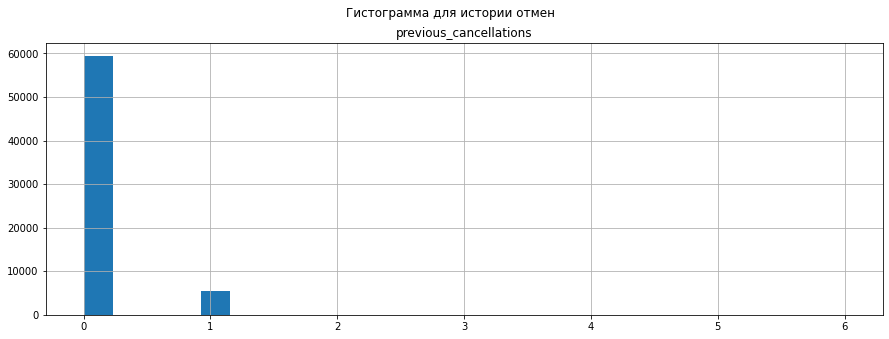

In [21]:
train_data = train_data[train_data['previous_cancellations'] <= 10]

train_data[previous_cancellations].hist(figsize=(15, 5), bins=26)
plt.suptitle("Гистограмма для истории отмен")
plt.show()

### Шаг 3. Формулировка ML-задачи на основе бизнес-задачи

**Оцените прибыль отеля без внедрения депозитов.**

Для расчета прибыли отеля необходимо учитывать стоимость номера, стоимость обслуживания при подготовке и проживании, сезонные коэффициенты. Мы также должны учитывать стоимость отмены бронирования номера.

In [22]:
hotel_test = pd.read_csv('/datasets/hotel_test.csv') # т.к. нам нужны удаленные столбцы, поэтому логичнее создать в начале 
# блокнота копию hotel_test и изменять ее, в итоге получиться неизмененный hotel_test и измененный test_data
hotel_test['meal'] = hotel_test['meal'].str.strip()

# Чтобы посчитать прибыль без внедрения депозита создам новый датафрейм hotel_profit
hotel_profit = hotel_test[['is_canceled', 'reserved_room_type', 'arrival_date_month', 'total_nights', 'arrival_date_year']]

# можно как у тебя словарь, но так просто проще создавать df
def get_room_cost(value):
    if value == 'A':
        return 1000
    if value== 'B':
        return 800
    if value == 'C':
        return 600
    if value == 'D':
        return 550
    if value == 'E':
        return 500
    if value == 'F':
        return 450
    return 350
    
    
hotel_profit['room_cost'] = hotel_profit['reserved_room_type'].apply(get_room_cost)

def get_room_service_cost(value):
    if value == 'A':
        return 400
    if value in ('B', 'C'):
        return 350
    return 150
    
    
hotel_profit['room_service_cost'] = hotel_profit['reserved_room_type'].apply(get_room_service_cost)

def get_season_coefficient(value):
    if value in ('June', 'July', 'August'):
        return 1.4
    if value in ('December', 'January', 'February'):
        return 1
    else:
        return 1.2
    
    
hotel_profit['season_coefficient'] = hotel_profit['arrival_date_month'].apply(get_season_coefficient)

def get_num_cleaning(value):
    return 1 + math.floor(value / 2)
  
    
hotel_profit['num_cleaning'] = hotel_profit['total_nights'].apply(get_num_cleaning)

display(hotel_profit.head())

def get_profit(row):
    if not row['is_canceled']:
        revenue = row['total_nights'] * row['room_cost'] * row['season_coefficient']
        losses = row['room_service_cost'] * row['num_cleaning']
        return revenue - losses
    return (row['room_service_cost'] + row['room_cost'] * row['season_coefficient']) * -1
    
    
hotel_profit['profit'] = hotel_profit.apply(get_profit, axis=1)  

display(hotel_profit.sample(5))

gain = hotel_profit['profit'].sum()
print(f'Выручка отеля без внедрения депозита за 8 месяцев 2017 года составила {format(gain, ",.1f").replace(",", ".")}')

,is_canceled,reserved_room_type,arrival_date_month,total_nights,arrival_date_year,room_cost,room_service_cost,season_coefficient,num_cleaning
0,1,A,January,1,2017,350,150,1.0,1
1,1,A,January,4,2017,350,150,1.0,3
2,1,A,January,4,2017,350,150,1.0,3
3,1,A,January,4,2017,350,150,1.0,3
4,1,A,January,7,2017,350,150,1.0,4


,is_canceled,reserved_room_type,arrival_date_month,total_nights,arrival_date_year,room_cost,room_service_cost,season_coefficient,num_cleaning,profit
31525,0,A,August,4,2017,350,150,1.4,3,1510.0
25659,0,A,May,2,2017,350,150,1.2,2,540.0
29293,0,E,July,1,2017,350,150,1.4,1,340.0
27906,0,D,June,4,2017,350,150,1.4,3,1510.0
25604,0,A,May,4,2017,350,150,1.2,3,1230.0


Выручка отеля без внедрения депозита за 8 месяцев 2017 года составила 12.835.890.0


### Шаг 4. Разработка модели ML

**Задачи:**
- Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.
- Выберите метрику для обучения.
- Оцените прибыль, которую принесёт выбранная модель за год.

Перед обучением модели машинного обучения важно определить проблему, которую мы пытаемся решить, и выбрать целевую переменную. В этом случае мы хотим предсказать, будет ли отменено резервирование или нет, что означает, что целевой переменной является столбец "is_canceled" в наборе данных.

Теперь мы будем обучать разные модели и оценивать их производительность с помощью кросс-валидации. Мы будем использовать три модели классификации: логистическую регрессию, дерево решений и случайный лес. Показателем обучения, который мы будем использовать, является оценка F1, которая представляет собой гармоническое среднее значение точности и полноты.

In [23]:
# Определим целевую переменную и признаки.
X_train = train_data.drop(['id', 'is_canceled'], axis=1)
y_train = train_data['is_canceled']

X_test = test_data.drop(['id', 'is_canceled'], axis=1)
y_test = test_data['is_canceled']

In [24]:
# Создадим конвейеры.
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')), ('std_scaler', StandardScaler())])
preprocessor_num = ColumnTransformer([('num', num_pipeline, num_features)])
log_reg_pipeline = Pipeline([('preprocessor', preprocessor_num), ('log_reg', LogisticRegression(random_state=42))])
ordinal_encoder = OrdinalEncoder()
preprocessor_cat = ColumnTransformer(transformers=[('ord', ordinal_encoder, cat_features)], remainder='passthrough')
dt_pipeline = Pipeline([('preprocessor', preprocessor_cat), ('dt', DecisionTreeClassifier(random_state=42))])
rf_pipeline = Pipeline([('preprocessor', preprocessor_cat), ('rf', RandomForestClassifier(random_state=42))])

In [25]:
# Определим сетку параметров для каждой модели
log_reg_param_grid = {'log_reg__C': [0.1, 1, 10]}
dt_param_grid = {'dt__max_depth': [5, 10, 20]}
rf_param_grid = {'rf__n_estimators': [50, 100, 200]}

# Создадим объекты поиска по сетке для каждой модели
log_reg_grid = GridSearchCV(log_reg_pipeline, log_reg_param_grid, cv=5, scoring='f1')
dt_grid = GridSearchCV(dt_pipeline, dt_param_grid, cv=5, scoring='f1')
rf_grid = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='f1')

# Сопоставим объекты поиска сетки и распечатаем лучший результат и параметры для каждой модели.
log_reg_grid.fit(X_train, y_train)
print('Лучший результат F1 для логистической регрессии:', log_reg_grid.best_score_)
print('Лучшие параметры для логистической регрессии:', log_reg_grid.best_params_)
print()

dt_grid.fit(X_train, y_train)
print('Лучший результат F1 для дерева решений:', dt_grid.best_score_)
print('Лучшие параметры для дерева решений:', dt_grid.best_params_)
print()

rf_grid.fit(X_train, y_train)
print('Лучший результат F1 для случайного леса:', rf_grid.best_score_)
print('Лучшие параметры для случайного леса:', rf_grid.best_params_)

Лучший результат F1 для логистической регрессии: 0.4788084566189642
Лучшие параметры для логистической регрессии: {'log_reg__C': 1}

Лучший результат F1 для дерева решений: 0.5437237934689625
Лучшие параметры для дерева решений: {'dt__max_depth': 5}

Лучший результат F1 для случайного леса: 0.3192179552684431
Лучшие параметры для случайного леса: {'rf__n_estimators': 100}


In [26]:
# Обучим и оценим лучшую модель на тестовых данных
y_pred = dt_grid.best_estimator_.predict(X_test)
f1 = f1_score(y_test, y_pred)
print('F1 оценка на тестовых данных:', f1)

F1 оценка на тестовых данных: 0.4941466420209489


In [27]:
# Рассчитаем предполагаемую прибыль на основе прогнозов модели
hotel_profit = X_test
hotel_profit['is_canceled'] = y_pred
hotel_profit['room_cost'] = hotel_profit['reserved_room_type'].apply(get_room_cost)
hotel_profit['room_service_cost'] = hotel_profit['reserved_room_type'].apply(get_room_service_cost)
hotel_profit['season_coefficient'] = hotel_profit['arrival_date_month'].apply(get_season_coefficient)
hotel_profit['total_nights'] = hotel_profit['stays_in_weekend_nights'] + hotel_profit['stays_in_week_nights']
hotel_profit['num_cleaning'] = hotel_profit['total_nights'].apply(get_num_cleaning)
hotel_profit['profit'] = hotel_profit.apply(get_profit, axis=1)

# Умножим на 12, чтобы получить ориентировочную прибыль за год
estimated_gain = hotel_profit['profit'].sum() * 12  

print(f'Расчетная прибыль за год составляет {format(estimated_gain, ",.1f").replace(",", ".")}')

Расчетная прибыль за год составляет 249.777.360.0


**Вывод:**

- Выручка отеля без внедрения депозита за 8 месяцев 2017 года составила: 12.835.890.0;
- Выручка отеля с учётом введения депозитов за год составила: 249.777.360.0.

Это показывает, что внедрение системы депозитов позволило существенно увеличить прибыль отеля и окупить затраты на разработку модели.

### Шаг 5. Опишите портрет «ненадёжного» клиента

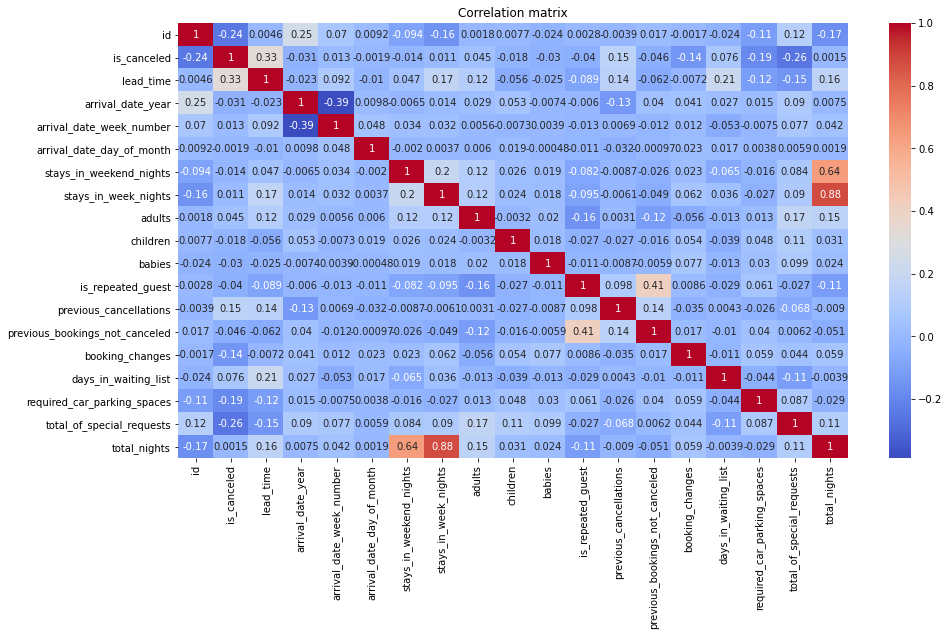

In [28]:
hotel_train = pd.read_csv('/datasets/hotel_train.csv')

# Исследование корреляции между признаками и отменой бронирования.
# Изучение корреляции между признаками и отменой бронирования может помочь нам понять, какие признаки более тесно связаны с 
# вероятностью отмены бронирования. Корреляция — это статистическая мера, указывающая на силу и направление взаимосвязи 
# между двумя переменными. Изучив матрицу корреляции, мы можем определить, какие признаки положительно или отрицательно 
# коррелируют с целевой переменной (например, с отменой бронирования). Эта информация может помочь нам определить наиболее 
# важные признаки и определить их приоритетность в нашем анализе. Например, если мы обнаружим, что время выполнения заказа 
# сильно коррелирует с отменами, мы можем захотеть дополнительно изучить эту связь, чтобы увидеть, как мы можем использовать 
# ее для прогнозирования и предотвращения отмен.
corr = hotel_train.corr()

fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation matrix')
plt.show()

Можно увидеть что столбцы "lead_time" и "previous_cancellations" коррелируют положительно с целевым признаком "is_canceled" больше чем остальные! Это может свидетельствоать о том, что бронирования с более длительным временем выполнения и историей предыдущих отмен с большей вероятностью будут отменены, чем бронирования с более коротким временем выполнения и без истории предыдущих отмен. Эта информация может быть использована для выявления потенциальных «неблагонадежных» клиентов, которые с большей вероятностью отменят свои бронирования, что позволит отелю принять соответствующие меры для управления их рисками и сокращения числа отмен.

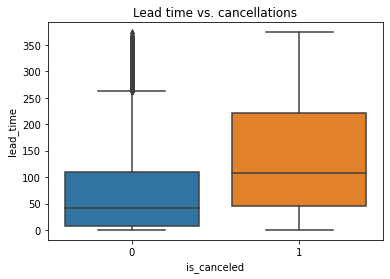

In [29]:
# Изучение взаимосвязи между временем выполнения заказа (количество дней между датой бронирования и датой прибытия гостя) и 
# отменами. Изучая взаимосвязь между временем выполнения заказа и отменами, мы можем понять, связаны ли 
# более длительные сроки выполнения с более высокой вероятностью отмены и существует ли какой-либо порог, после которого 
# время выполнения заказов становится особенно рискованным.
sns.boxplot(x='is_canceled', y='lead_time', data=hotel_train)
plt.title('Lead time vs. cancellations')
plt.show()

Коробчатая диаграмма показывает что с увеличением временем выполнения заказа увеличивается и количество отмен броней! 
- Средние 50% данных в категории "неотмененных броней" лежат в диапазоне 0-10, с медианой около 48, при этом видны много выбросов в этой категории данных. 
- Средние 50% данных в категории "отмененных броней" лежат в диапазоне 50-210, с медианой около 100, при этом видны выбросов в этой категории данных вообще нет.
- Т.к. медианы двух полей сильно различаются, это говорит о разнице во времени выполнения для отмененных и неотмененных бронирований.
- Т.к. для неотмененных бронирований имеется много выбросов в отношении высоких сроков выполнения, это говорит о том, что есть некоторые заказы с очень длительными сроками выполнения, которые не были отменены. Это может означать, что определенные типы бронирований, например сделанные заблаговременно или в часы пик, с меньшей вероятностью будут отменены, даже если они имеют большое время выполнения заказа. Это также может указывать на то, что клиенты, которые бронируют заранее, более привержены своим планам поездок и с меньшей вероятностью отменяют их.

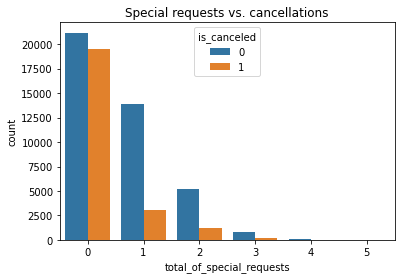

In [30]:
# Изучая взаимосвязь между общим количеством особых запросов и отменами, мы можем понять, существует ли корреляция 
# между количеством особых запросов, сделанных гостем, и вероятностью отмены бронирования. Если мы наблюдаем более 
# высокий уровень отмен для гостей, которые делают больше специальных запросов, это может свидетельствовать о том, что 
# эти гости более требовательны или имеют более высокие ожидания, которые могут не оправдаться, что приводит к 
# неудовлетворенности и, в конечном итоге, к отмене их бронирования. В качестве альтернативы мы можем заметить, что гости, 
# которые делают меньше особых запросов, имеют более высокий процент отмен, что может указывать на то, что они меньше 
# инвестируют в свое бронирование или с большей вероятностью изменят свои планы, что приведет к отмене. 
# Изучая эту взаимосвязь, мы можем получить представление о поведении и предпочтениях гостей, что может повлиять на 
# наш подход к управлению бронированиями и повышению удовлетворенности гостей.
sns.countplot(x='total_of_special_requests', hue='is_canceled', data=hotel_train)
plt.title('Special requests vs. cancellations')
plt.show()

Cтолбчатая диаграмма показывает, что гости требовательные к специальным запросам не отменяют бронь либо отменяют очень редко, по сравнению с гостями без специальных запросов. Это может указывать на то, что они меньше инвестируют в свое бронирование или с большей вероятностью изменят свои планы, что приводит к отмене. 

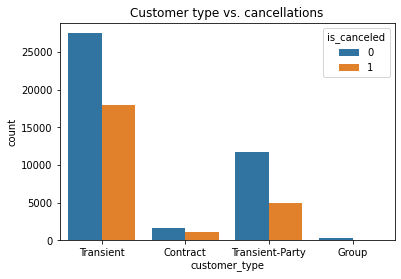

In [31]:
# Изучение взаимосвязи между типом клиента и отменой бронирования может помочь нам понять, являются ли определенные 
# типы клиентов более склонными к отмене бронирований, чем другие. Эта информация может быть полезна для выявления 
# признаков «неблагонадежного» клиента, как указано в шаге 5 проекта. Например, если мы обнаружим, что клиенты, которые 
# бронируют через определенный канал или относятся к определенному типу клиентов, с большей вероятностью отменят свои заказы,
# мы можем использовать эту информацию, чтобы скорректировать наши маркетинговые или коммуникационные стратегии, чтобы лучше 
# ориентироваться и удерживать клиентов, которые скорее всего, выполнят свои заказы.

# Contract — договор с юридическим лицом;
# Group — групповой заезд;
# Transient — не связано с договором или групповым заездом;
# Transient-party — не связано с договором или групповым заездом, но связано с бронированием типа Transient.

sns.countplot(x='customer_type', hue='is_canceled', data=hotel_train)
plt.title('Customer type vs. cancellations')
plt.show()

Из столбчатой диаграммы видно, что наименее благонадежные клиенты находятся в категории, не связанной с договором или групповым заездом.

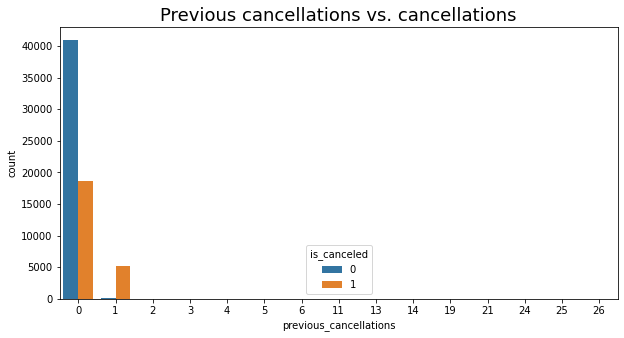

In [32]:
# Изучение взаимосвязи между предыдущими отменами и отменами может дать представление о том, с большей ли вероятностью гости,
# которые ранее отменили свои бронирования, отменят их снова. Это также может помочь определить любые закономерности или 
# тенденции в отменах на основе количества предыдущих отмен. Например, если гости с большим количеством предыдущих отмен 
# с большей вероятностью отменят снова, это может означать, что существуют определенные факторы, которые приводят к таким 
# отменам, которые необходимо устранить.
fig, axs = plt.subplots(figsize=(10, 5))

sns.countplot(x='previous_cancellations', hue='is_canceled', data=hotel_train, ax=axs)
plt.title('Previous cancellations vs. cancellations', fontsize=18)
plt.show()

Столбчатая диаграмма показывает, что если у клиента была хоть 1 предыдущая отмена брони, то он более склонен отменить бронь, что может указывать на ненадежность клиентов из данной категории.

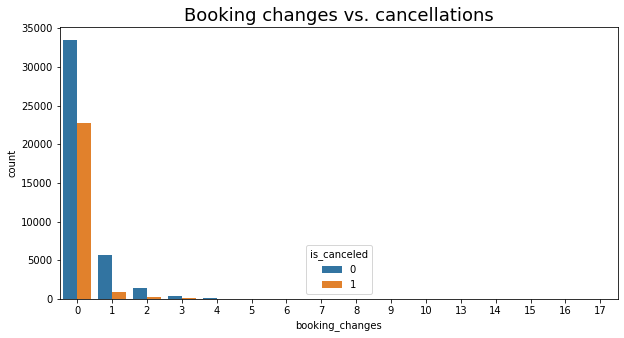

In [33]:
# Изучение взаимосвязи между изменениями в бронировании и отменами может дать представление о том, как количество изменений,
# внесенных в бронирование, влияет на вероятность отмены. Например, если существует более высокий процент отмен бронирований,
# в которые были внесены множественные изменения, это может свидетельствовать о том, что клиенты, которые вносят больше 
# изменений, с большей вероятностью отменят свое бронирование. Эта информация может быть полезна для выявления потенциально 
# ненадежных клиентов и соответствующей корректировки политики отеля.
fig, axs = plt.subplots(figsize=(10, 5))

sns.countplot(x='booking_changes', hue='is_canceled', data=hotel_train, ax=axs)
plt.title('Booking changes vs. cancellations', fontsize=18)
plt.show()

Данная столбчатая диаграмма не показывает то, что внесение изменений в бронирование клиентом явно приводит к отменам брони. Наибольшее число отмен брони в категории клиентов, которое вообще не вносили изменений в бронь, а если клиенты вносили хоть 1 и больше изменений, то количетсво отмен броней резко падает, что свидетельствует о том, что клиенты, которые вносят изменения в бронь, скорее всего его не отменят.

**Портрет ненадежного клиента**:

По результатам исследовательского анализа данных «неблагонадежным» клиентом можно назвать человека, который:

- Имеет историю предыдущих отмен
- Находится в категории вне-контрактных или вне-групповых поездок.
- У них долгое время ожидания бронирования, особенно если они не в пик сезона бронирования.
- Не вносил никаких изменений в свое бронирование, поскольку клиенты, которые вносят изменения в свое бронирование, с меньшей вероятностью отменяют его.
- Не имеет особых запросов, так как гости с особыми запросами с меньшей вероятностью отменят бронирование.

Выявление этих характеристик может помочь отелям принять соответствующие меры для управления рисками и сокращения количества отмен.

### Шаг 6. Напишите общий вывод

Модель дерева решений с настройкой гиперпараметров показала лучшие результаты с точки зрения оценки F1, а введение депозитной системы значительно увеличило доход отеля.

Основываясь на выводах, полученных в результате анализа, я рекомендую отелю предпринять следующие действия:

- Внедрить депозитную систему, чтобы сократить количество отмен и увеличить доход.
- Отслеживать клиентов, у которых есть история отмен, и принимать соответствующие меры для управления рисками.
- Поощрять клиентов вносить изменения в свои бронирования, так как это снижает вероятность отмены.
- Создавать стимулы для клиентов, чтобы они делали особые запросы, поскольку эти клиенты с меньшей вероятностью отменят свои бронирования.